<h1 align="center">DATA CLEANING</h1>
<h2 align="left"><ins>Lesson Guide</ins></h2>

- [**DATA CLEANING**](#intro)
    - [**Identify & Remove Columns That Contain a Single Value**](#single)
    - [**Consider Columns That Have Very Few Unique Values**](#few)
    - [**Remove Columns That Have A Low Variance**](#variance)
    - [**Identify & Remove Rows That Contain Duplicate Data**](#duplicate)
- [**OUTLIER IDENTIFICATION AND REMOVAL**](#outlier)
    - [**What are Outliers?**](#what)
    - [**Standard Deviation Method**](#std)
    - [**Interquartile Range Method**](#iqr)
    - [**Automatic Outlier Detection**](#auto)
- [**HOW TO HANDLE MISSING DATA**](#missing)
    - [**Identify & Mark Missing Values**](#identify)
    - [**Remove Rows With Missing Values**](#remove)
    - [**How to Use Statistical Imputation**](#impute)
        - [**Using Pandas to Fill Missing Values**](#fill)
        - [**SimpleImputer Data Transform**](#transform)
        - [**SimpleImputer and Model Evaluation**](#eval)
        - [**Comparing Different Imputed Statistics**](#compare)
        - [**SimpleImputer Transform When Making a Prediction**](#predict)
    - [**How to Use KNN Imputation**](#knn)
        - [**KNNImputer Data Transform**](#data)
        - [**KNNImputer and Model Evaluation**](#model)
        - [**KNNImputer and Different Number of Neighbors**](#range)
        - [**KNNImputer Transform When Making a Prediction**](#make)
    - [**How to Use Iterative Imputation**](#iter)
        - [**IterativeImputer Data Transform**](#iidt)
        - [**IterativeImputer and Model Evaluation**](#ii_model)
        - [**IterativeImputer and Different Imputation Order**](#order)
        - [**IterativeImputer and Different Number of Iterations**](#number)
        - [**IterativeImputer Transform When Making a Prediction**](#ii_pred)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

%matplotlib inline

In [2]:
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import (train_test_split, KFold, 
                                     cross_val_score, RepeatedStratifiedKFold)

<a id="intro"></a>
<h1 align="center">DATA CLEANING</h1>

**Data cleaning** refers to identifying and correcting errors in the dataset that may negatively impact a predictive model. Data cleaning is a critically important step in any machine learning project. In tabular data, there are many different statistical analysis and data visualization techniques used to explore the data in order to identify any data cleaning operations that may be required. There are many types of errors that exist in a dataset, although some of the simplest errors include columns that don’t contain much information and duplicated rows. Although critically important, it is neither exciting, nor does it involve fancy techniques. Just a good knowledge of the dataset. 

<a id="single"></a>
<h3 style="text-decoration:underline">Identify & Remove Columns That Contain a Single Value</h3>

Columns that have a single observation or value are probably useless for modeling. These columns or predictors are referred to as *zero-variance predictors* - if we measured the variance (average value from the mean), it would be zero. 
>**Columns that have a single value for all rows do not contain any information for modeling. Depending on the choice of data preparation and modeling algorithms, variables with a single value can also cause errors or unexpected results.**
>>**Variables or columns that have a single value should probably be removed from your dataset.**

In [3]:
# using numpy 
# data = np.loadtxt('./datasets/Data Cleaning/oil_spill.csv', delimiter=',')

# using pandas
df = pd.read_csv('./datasets/Data Cleaning/oil_spill.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [4]:
# column-wise unique value count
print(df.nunique().values)

[238 297 927 933 179 375 820 618 561  57 577  59  73 107  53  91 893 810
 170  53  68   9   1  92   9   8   9 308 447 392 107  42   4  45 141 110
   3 758   9   9 388 220 644 649 499   2 937 169 286   2]


We can see that the column at index 22 only has a single value (all are zeros). 

In [5]:
# df.nunique().loc[lambda x : x==1]
# df.nunique()[lambda x: x==1]

In [6]:
# get number of unique values for each column
counts = df.nunique()
print(f'Original shape is: {df.shape}')

# record columns to delete
to_del = [i for i,v in enumerate(counts) if v == 1]
print(f'Columns to delete are: {to_del}')

# drop useless columns
df.drop(to_del, axis=1)
# df.drop(columns=[22], inplace=True)

print(f'New shape after removal is: {df.drop(to_del, axis=1).shape}')

Original shape is: (937, 50)
Columns to delete are: [22]
New shape after removal is: (937, 49)


<a id="few"></a>
<h3 style="text-decoration:underline">Consider Columns That Have Very Few Unique Values</h3>

There are some columns in the dataset that have less than 10 unique values. This might make sense for ordinal or categorical variables. However, in this case, the dataset only contains numerical variables. As such, only having 2, 4, or 9 unique numerical values in a column might be surprising. We can refer to these columns or predictors as *near-zero variance predictors*, as their variance is not zero, but a very small number close to zero.
>**These columns may or may not contribute to the performance of a model.** We can’t assume that they are useless to modeling. Depending on the choice of data preparation and modeling algorithms, variables with very few numerical values can also cause errors or unexpected results. 

To help highlight columns of this type, we can calculate the number of unique values for each variable as a percentage of the total number of rows in the dataset. 

In [7]:
for col in df.columns:
    if df[col].nunique() > 10:
#         print(f'The column {col} has {df[col].nunique()} unique values and is good to go')
        continue
    else:
        print(f'The column {col} has {df[col].nunique()} unique values which are:\n{df[col].unique()}\n')

The column 21 has 9 unique values which are:
[ 87.65  75.26  67.87  85.22 126.08 123.47  47.66  69.09  55.85]

The column 22 has 1 unique values which are:
[0]

The column 24 has 9 unique values which are:
[ 132.78  351.67  421.21  422.12 2025.42 2036.8   204.34  239.69  221.97]

The column 25 has 8 unique values which are:
[-0.01  0.18  1.83  1.01 -0.53 -0.71  0.97  0.87]

The column 26 has 9 unique values which are:
[ 3.78  9.24 14.78 12.06  3.01  2.96  4.66  3.83  5.07]

The column 32 has 4 unique values which are:
[0.   0.01 0.87 0.86]

The column 36 has 3 unique values which are:
[0.   0.01 0.02]

The column 38 has 9 unique values which are:
[ 89  78  64  85 133 143  99 102  82]

The column 39 has 9 unique values which are:
[69 55 39 63 85 86 67 73 50]

The column 45 has 2 unique values which are:
[0 1]

The column 49 has 2 unique values which are:
[1 0]



In [8]:
test = pd.DataFrame(data=df.nunique(),columns=['Unique Count'],
                    index=df.columns)

# calculate the percentage of unique values to the total number of rows
test['% of total_rows'] = test['Unique Count'].apply(lambda x: (x/df.shape[0])*100)

# only include columns that have less than 10 unique values
test[test['Unique Count']<10]

,Unique Count,% of total_rows
21,9,0.960512
22,1,0.106724
24,9,0.960512
25,8,0.853789
26,9,0.960512
32,4,0.426894
36,3,0.320171
38,9,0.960512
39,9,0.960512
45,2,0.213447


We can see that 11 of the 50 numerical variables have unique values that are less than 1 percent of the number of rows. This does not mean that these rows and columns should be deleted, but they require further attention. 
- Perhaps the unique values can be encoded as ordinal values.
- Perhaps the unique values can be encoded as categorical values.
- Perhaps compare model performance with each variable removed from the dataset.

For example, if we wanted to delete all 10 columns with unique values less than 1 percent of rows:

```python
counts = df.nunique()
to_del = [i for i,v in enumerate(counts) if (float(v)/df.shape[0]*100) < 1]
         [i for i,v in counts.items() if (v/df.shape[0]*100) < 1]
df.drop(to_del, axis=1, inplace=True)
```

In [9]:
# df.nunique().loc[lambda x : x==1]
# data.df.nunique()[lambda x: x==1]

<a id="variance"></a>
<h3 style="text-decoration:underline">Remove Columns That Have A Low Variance</h3>

Another approach to the problem of removing columns with few unique values is to consider the variance of the column. Recall that the variance is a statistic calculated as the average squared difference of values in the sample from its mean. 
>The variance can be used as a filter for identifying columns to be removed from the dataset. A column that has a single value has a variance of 0.0, and a column that has very few unique values may have a small variance.

One approach is using numpy and pandas:

```python
variance = np.var(df)
low_variance = [i for i,v in variance.items() if v < threshold]
df.drop(low_variance, axis=1, inplace=True)
```

Another approach is the `VarianceThreshold` class from the scikit-learn library. An instance of the class can be created and we can specify the threshold argument, which defaults to 0.0 to remove columns with a single value. It can then be fit and applied to a dataset by calling the `fit_transform()` function to create a transformed version of the dataset where the columns that have a variance lower than the threshold have been removed automatically.

In [10]:
from sklearn.feature_selection import VarianceThreshold

In [11]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
print(X.shape, y.shape)

# define the transform
transform = VarianceThreshold()

# transform the input data
X_sel = transform.fit_transform(X)
print(X_sel.shape)

(937, 49) (937,)
(937, 48)


The transform (with a default threshold of 0.0) has removed all columns with a variance of 0.0 - i.e. the single column where all values are the same (column 22).

We can also see what happens when we use different thresholds.

In [12]:
# define thresholds to check
thresholds = np.arange(0.0, 0.55, 0.05)

# apply transform with each threshold
results = list()
for t in thresholds:
    
    # define the transform
    transform = VarianceThreshold(threshold=t)
    
    # transform the input data
    X_sel = transform.fit_transform(X)
    
    # determine the number of input features
    n_features = X_sel.shape[1]
    
    # store the result
    results.append(n_features)
    
    print('>Threshold=%.2f, Features=%d, #_cols_removed=%d' % (t, n_features,X.shape[1]-n_features)) 

>Threshold=0.00, Features=48, #_cols_removed=1
>Threshold=0.05, Features=37, #_cols_removed=12
>Threshold=0.10, Features=36, #_cols_removed=13
>Threshold=0.15, Features=35, #_cols_removed=14
>Threshold=0.20, Features=35, #_cols_removed=14
>Threshold=0.25, Features=35, #_cols_removed=14
>Threshold=0.30, Features=35, #_cols_removed=14
>Threshold=0.35, Features=35, #_cols_removed=14
>Threshold=0.40, Features=35, #_cols_removed=14
>Threshold=0.45, Features=33, #_cols_removed=16
>Threshold=0.50, Features=31, #_cols_removed=18


We can see that the number of features in the dataset quickly drops from 48 in the unchanged data down to 35 with a threshold of 0.15. It later drops to 31 (18 columns deleted) with a threshold of 0.5. We can illustrate the relationship between the threshold and the number of features in the transformed dataset using a line plot. Even with a small threshold between 0.15 and 0.4, a large number of features are removed immediately.

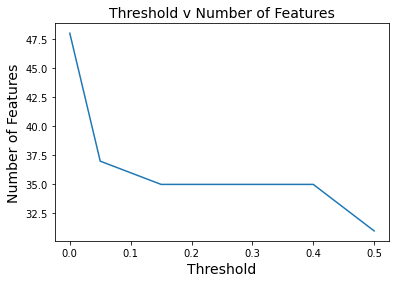

In [13]:
plt.plot(thresholds, results)
plt.xlabel('Threshold',fontsize=14)
plt.ylabel('Number of Features',fontsize=14)
plt.title('Threshold v Number of Features', fontsize=14)
plt.show()

<a id="duplicate"></a>
<h3 style="text-decoration:underline">Identify & Remove Rows That Contain Duplicate Data</h3>

Rows that have identical data are useless to the modeling process, if not dangerously misleading during model evaluation. Here, a duplicate row is a row where each value in each column for that row appears in identically the same order (same column values) in another row. Machine learning algorithms will perform better by identifying and removing rows with duplicate data. From an algorithm evaluation perspective, duplicate rows will result in misleading performance. 

In [14]:
df_iris = pd.read_csv('./datasets/Data Cleaning/iris_flowers.csv', header=None)

In [15]:
df_iris.duplicated().any()

True

In [16]:
df_iris[df_iris.duplicated()]

,0,1,2,3,4
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


Rows of duplicate data should probably be deleted from your dataset prior to modeling.

In [17]:
print(f'Original Shape: {df_iris.shape}')

# delete duplicate rows
df_iris.drop_duplicates(inplace=True)
print(f'After removing duplicates: {df_iris.shape}')

Original Shape: (150, 5)
After removing duplicates: (147, 5)


<a id="outlier"></a>
<h1 align="center">OUTLIER IDENTIFICATION AND REMOVAL</h1>

When modeling, it is important to clean the data to ensure the observations best represent the problem. Sometimes data can contain extreme values that are outside the range of what is expected and unlike the other data. These are called **outliers** and often machine learning modeling and model performance in general can be improved by understanding and even removing these outlier values.

<a id="what"></a>
<h3 style="text-decoration:underline">What are Outliers?</h3>

An outlier is an observation that is unlike the other observations. They are rare, distinct, or do not fit in some way. Outliers can have many causes, such as:
- Measurement or input error.
- Data corruption.
- True outlier observation.

There is no precise way to define and identify outliers in general because of the specifics of each dataset. Instead, a domain expert should interpret the raw observations and decide whether a value is an outlier or not. Nevertheless, we can use statistical methods to identify observations that appear to be rare or unlikely given the available data. This does not mean that the values identified are outliers and should be removed, but rather shed light on rare events that may require a second look.
>A good tip is to consider plotting the identified outlier values, perhaps in the context of non-outlier values to see if there are any systematic relationships or pattern to the outliers. If there is, perhaps they are not outliers and can be explained, or perhaps the outliers themselves can be identified more systematically.

<a id="std"></a>
<h3 style="text-decoration:underline">Standard Deviation Method</h3>

Let’s define a dataset we can use to test the methods. We will generate a population of 10,000 random numbers drawn from a Gaussian distribution with a mean of 50 and a standard deviation of 5. Numbers drawn from a Gaussian distribution will have outliers. That is, by virtue of the distribution itself, there will be a few values that will be a long way from the mean, rare values that we can identify as outliers.

In [18]:
# seed the random number generator
np.random.seed(1)
# generate univariate observations
data = 5 * np.random.randn(10000) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (np.mean(data), np.std(data)))

mean=50.049 stdv=4.994


If we know that the distribution of values in the sample is Gaussian or Gaussian-like, we can use the standard deviation of the sample as a cut-off for identifying outliers. The Gaussian distribution has the property that the standard deviation from the mean can be used to reliably summarize the percentage of values in the sample. 
- 1 Standard Deviation from the Mean: 68 percent.
- 2 Standard Deviations from the Mean: 95 percent.
- 3 Standard Deviations from the Mean: 99.7 percent.

So, if the mean is 50 and the standard deviation is 5, then all data in the sample between 45 and 55 will account for about 68 percent of the data sample. 

A value that falls outside of 3 standard deviations is part of the distribution, but it is an unlikely or rare event. Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95 percent) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9 percent) can be used.

In [19]:
# calculate summary statistics
data_mean, data_std = np.mean(data), np.std(data)

# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Identified outliers: 29
Non-outlier observations: 9971


You can use the same approach if you have multivariate data, e.g. data with multiple variables, each with a different Gaussian distribution. You can imagine bounds in two dimensions that would define an ellipse if you have two variables. Observations that fall outside of the ellipse would be considered outliers. In three dimensions, this would be an ellipsoid, and so on into higher dimensions. Alternately, if you knew more about the domain, perhaps an outlier may be identified by exceeding the limits on one or a subset of the data dimensions.

<a id="iqr"></a>
<h3 style="text-decoration:underline">Interquartile Range Method</h3>

Not all data is normal or normal enough to treat it as being drawn from a Gaussian distribution. A good statistic for summarizing a non-Gaussian distribution sample of data is the Interquartile Range, or IQR for short. The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot. Remember that percentiles can be calculated by sorting the observations and selecting values at specific indices. The 50th percentile is the middle value, or the average of the two middle values for an even number of examples. We refer to the percentiles as quartiles (quart meaning 4) because the data is divided into four groups via the 25th, 50th and 75th values. The IQR defines the middle 50 percent of the data, or the body of the data. 

The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5. A factor k of 3 or more can be used to identify values that are extreme outliers or far outs when described in the context of box and whisker plots. On a box and whisker plot, these limits are drawn as fences on the whiskers (or the lines) that are drawn from the box. Values that fall outside of these values are drawn as dots. We can calculate the percentiles of a dataset using the percentile() NumPy function that takes the dataset and specification of the desired percentile. The IQR can then be calculated as the difference between the 75th and 25th percentiles.

In [20]:
# calculate interquartile range
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674
Identified outliers: 81
Non-outlier observations: 9919


The approach can be used for multivariate data by calculating the limits on each variable in the dataset in turn, and taking outliers as observations that fall outside of the rectangle or hyper-rectangle.

<a id="auto"></a>
<h3 style="text-decoration:underline">Automatic Outlier Detection</h3>

In machine learning, an approach to tackling the problem of outlier detection is one-class classification. A one-class classifier aims at capturing characteristics of training instances, in order to be able to distinguish between them and potential outliers to appear.

A simple approach to identifying outliers is to locate those examples that are far from the other examples in the multi-dimensional feature space. This can work well for feature spaces with low dimensionality (few features), although it can become less reliable as the number of features is increased, referred to as the curse of dimensionality. The local outlier factor, or LOF for short, is a technique that attempts to harness the idea of nearest neighbors for outlier detection. Each example is assigned a scoring of how isolated or how likely it is to be outliers based on the size of its local neighborhood. Those examples with the largest score are more likely to be outliers. The scikit-learn library provides an implementation of this approach in the `LocalOutlierFactor` class.

In [21]:
df = pd.read_csv('./datasets/Data Cleaning/boston_housing.csv',
                 names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                        'DIS','RAD','TAX', 'PTRATIO', 'B', 'LSTAT','MEDV'])

X = df.drop(columns=['MEDV'])
y = df['MEDV']

# summarize the shape of the dataset
print(X.shape, y.shape)

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=1)

# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(506, 13) (506,)
(339, 13) (167, 13) (339,) (167,)


In [22]:
df.head(2).round(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,18.0,2.31,0,0.54,6.58,65.2,4.09,1,296.0,15.3,396.9,4.98,24.0
1,0.03,0.0,7.07,0,0.47,6.42,78.9,4.97,2,242.0,17.8,396.9,9.14,21.6


It is a regression predictive modeling problem, meaning that we will be predicting a numeric value. All input variables are also numeric. In this case, we will fit a linear regression algorithm and evaluate model performance by training the model on the test dataset and making a prediction on the test data and evaluate the predictions using the mean absolute error (MAE). 

We can also try removing outliers from the training dataset. The expectation is that the outliers are causing the linear regression model to learn a bias or skewed understanding of the problem, and that removing these outliers from the training set will allow a more effective model to be learned. We can achieve this by defining the LocalOutlierFactor model and using it to make a prediction on the training dataset, marking each row in the training dataset as normal (1) or an outlier (-1). We will use the default hyperparameters for the outlier detection model, although it is a good idea to tune the configuration to the specifics of the dataset.

In [23]:
# fit the model
full_model = LinearRegression()
full_model.fit(X_train, y_train)
print(X_train.shape, y_train.shape)

# evaluate the model
yhat = full_model.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('The MAE with the full dataset: %.3f' % mae)

(339, 13) (339,)
The MAE with the full dataset: 3.417


In [24]:
from sklearn.neighbors import LocalOutlierFactor

In [25]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat_new = lof.fit_predict(X_train)

# select all rows that are not outliers
mask = (yhat_new != -1)
X_train_out, y_train_out = X_train[mask], y_train[mask]
print(X_train_out.shape, y_train_out.shape)

# fit the model
model_out = LinearRegression()
model_out.fit(X_train_out, y_train_out)

# evaluate the model
yhat_out = model_out.predict(X_test)

# evaluate predictions
mae = mean_absolute_error(y_test, yhat_out)
print('The MAE after removing the outliers: %.3f' % mae)

(305, 13) (305,)
The MAE after removing the outliers: 3.356


Firstly, we can see that the number of examples in the training dataset has been reduced from 339 to 305, meaning 34 rows containing outliers were identified and deleted. We can also see a reduction in MAE from about 3.417 by a model fit on the entire training dataset, to about 3.356 on a model fit on the dataset with outliers removed.

The Scikit-Learn library provides other outlier detection algorithms that can be used in the same way such as:
- `sklearn.ensemble.IsolationForest`
- `sklearn.covariance.EllipticEnvelope` - An object for detecting outliers in a Gaussian distributed dataset.
- `sklearn.svm.OneClassSVM` - Unsupervised Outlier Detection. Estimate the support of a high-dimensional distribution. The implementation is based on libsvm.

https://scikit-learn.org/stable/modules/outlier_detection.html#

<a id="missing"></a>
<h1 align="center">HOW TO HANDLE MISSING DATA</h1>

Most Real-world data has missing values, with the likelihood increasing with the size of the dataset. Handling missing data is important as many machine learning algorithms do not support data with missing values. As such, it is good practice to identify and replace missing values for each column in the input data prior to modeling. This is called ***missing data imputation*** (or ***imputing***).  

In [26]:
df_diab = pd.read_csv('./datasets/Data Cleaning/Diabetes.csv',header=None)
df_diab.columns = ['pregnant','glucose_conc','blood_press','tricep_thick',
                  'serum_ins','bmi','pedigree','age','target']

df_diab.drop('target',axis=1).describe().round(2)

,pregnant,glucose_conc,blood_press,tricep_thick,serum_ins,bmi,pedigree,age
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00


<a id="identify"></a>
<h3 style="text-decoration:underline">Identify & Mark Missing Values</h3>

Missing values are identified within rows of data where one or more values or columns in that row are not present. The values may be missing completely or they may be marked with a special character or value. No matter how they appear, knowing what to expect and checking to make sure the data matches that expectation will reduce future problems.<br>
>**Missing values are frequently indicated by out-of-range entries; perhaps a negative number (e.g., -1) in a numeric field that is normally only positive, or a 0 in a numeric field that can never normally be 0.**
>>**Values could be missing for many reasons, often specific to the problem domain, and might include reasons such as corrupt measurements or data unavailability.**


From the descriptive statistics above, We can see that there are columns that have a minimum value of zero (0). On most of these columns, a value of zero does not make sense and indicates an invalid or missing value. Specifically, the following columns have an invalid zero minimum value: glucose_conc, blood_press, tricep_thick, serum_ins and bmi. We can corroborate this by the definition of those columns and the domain knowledge that a zero value is invalid for those measures, e.g. a zero for body mass index or blood pressure is invalid.
>**In Python, specifically Pandas, NumPy and Scikit-Learn, we mark missing values as NaN.** Values with a NaN value are ignored from operations like sum, count, etc.

In [27]:
cols_with_zeros = ['glucose_conc', 'blood_press', 'tricep_thick',
                   'serum_ins', 'bmi']

# Using pandas .where
# df_diab[cols_with_zeros].where(df_diab[cols_with_zeros]!=0,np.nan)
# df_diab[cols_with_zeros].where(df_diab[cols_with_zeros]!=0)


# Using pandas .mask
# df_diab[cols_with_zeros].mask(df_diab[cols_with_zeros]==0,np.nan)
# df_diab[cols_with_zeros].mask(df_diab[cols_with_zeros]==0)

# Using pandas .replace
# df_diab[cols_with_zeros] = df_diab[cols_with_zeros].replace(0,np.nan)
df_diab[cols_with_zeros] = df_diab[cols_with_zeros].replace({0:np.nan})

Now that the missing values have been replaced by NaN, detecting missing values is easier via Pandas. 
- `isnull()`|`isna()` - detects missing values
- `notnull()`|`notna()` - detects non-missing values
- `count()` - counts the non-NA cells for each column or row

In [28]:
# As a series
null_count = df_diab.isnull().sum()

null_count[null_count>0]

glucose_conc      5
blood_press      35
tricep_thick    227
serum_ins       374
bmi              11
dtype: int64

In [29]:
# As a dataframe

null_df = pd.DataFrame(df_diab.isna().sum(), columns=['Null_Count'])
null_df.index.name = 'Column'
# null_df.sort_values(['Null_Count'], ascending=False)
null_df[null_df['Null_Count']>0]

,Null_Count
Column,
glucose_conc,5
blood_press,35
tricep_thick,227
serum_ins,374
bmi,11


We can see that columns at index 1, 2 and 5 have just a few zero values, whereas columns 3 and 4 show a lot more, nearly half of the rows. This highlights that different missing value strategies may be needed for different columns, e.g. to ensure that there are still a sufficient number of records left to train a predictive model.

There are also many different visualizations for missing values.

<AxesSubplot:>

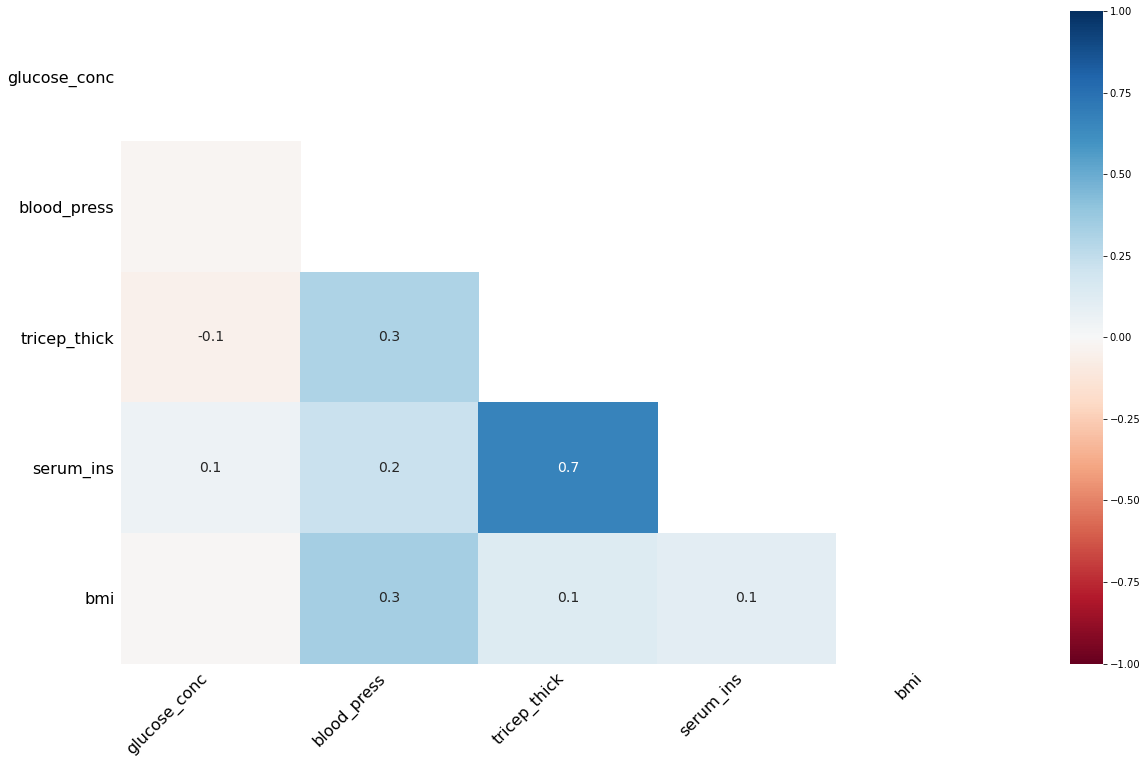

In [30]:
# sns.heatmap(df_diab.isnull(),cbar=False,cmap='viridis')

# msno.bar(df_diab)
# msno.matrix(df_diab)
msno.heatmap(df_diab)

The heatmap is used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.
- Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.
- Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.
- Values close to 0, indicate there is little to no relationship between the presence of null values in one column compared to another.

<AxesSubplot:>

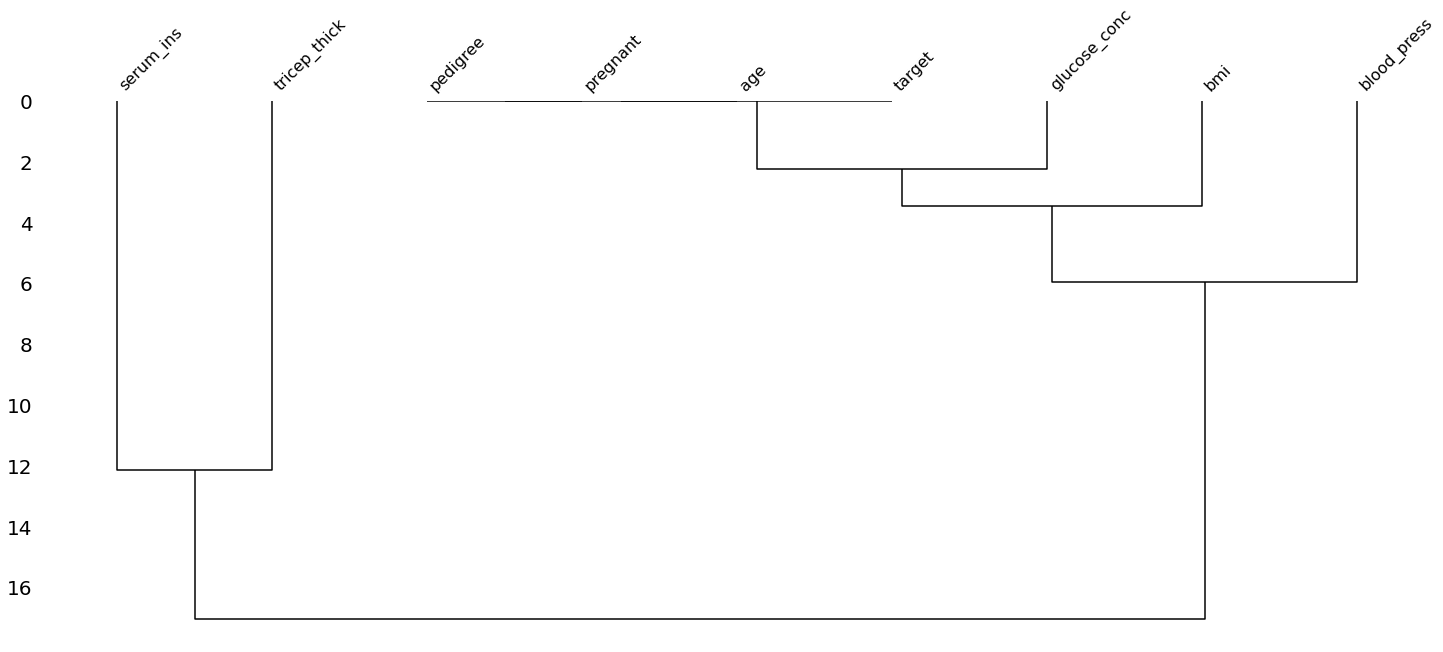

In [31]:
msno.dendrogram(df_diab)

The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity. If a number of columns are grouped together at level zero, then the presence of nulls in one of those columns is directly related to the presence or absence of nulls in the others columns. The more separated the columns in the tree, the less likely the null values can be correlated between the columns.

Finding missing data is the easy part! Determining what to do next is more complicated. Typically, we are most interested in knowing why we are missing data. Once we know what 'type of missingness' we have (the source of missing data), we can proceed effectively. How we fill in data depends largely on why it is missing (types of missingness) and what sampling we have available to us. The most common options are:
- **Delete missing data altogether**
- **Fill in missing data**
- **Collect more data:**

<a id="remove"></a>
<h3><ins>Remove Rows With Missing Values</ins></h3>

The simplest strategy for handling missing data is to remove records that contain a missing value. This is as simple as using Pandas `dropna` function along with the axis argument. By default, axis=0, i.e., along row, which means that if any value within a row is NA then the whole row is excluded.
>**Though not always recommended, it is okay to drop missing rows if less than 5%.**

In [32]:
# original shape including missing values

df_diab.shape

(768, 9)

In [33]:
# new shape after removing all rows with missing values in them

df_diab.dropna().shape

(392, 9)

In [34]:
df_diab.dropna(inplace=True)
X = df_diab.drop(columns=['target'])
y = df_diab['target']

# define the model
model = LinearDiscriminantAnalysis()

# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)

# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# report the mean performance
print('Accuracy: %.3f' % np.mean(result))

Accuracy: 0.781


Removing rows with missing values can be too limiting on some predictive modeling problems. An alternative is to **impute missing values**.

<a id="impute"></a>
<h3><ins>How to Use Statistical Imputation</ins></h3>

A simple and popular approach to data imputation involves using statistical methods to estimate a value for a column from those values that are present, then replace all missing values in the column with the calculated statistic. It is simple because statistics are fast to calculate and it is popular because it often proves very effective. Some common statistics are:
- mean
- median
- mode
- constant

In [35]:
# load dataset - missing values are maarked with a ?
df_horse = pd.read_csv('./datasets/Data Cleaning/horse_colic.csv',
                       header=None, na_values='?')

df_horse.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,45.0,8.4,NaN,NaN,2.0,2,11300,0,0,2
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,50.0,85.0,2.0,2.0,3.0,2,2208,0,0,2
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,33.0,6.7,NaN,NaN,1.0,2,0,0,0,1
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,48.0,7.2,3.0,5.3,2.0,1,2208,0,0,1
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,74.0,7.4,NaN,NaN,2.0,2,4300,0,0,2


In [36]:
# summarize the number of rows with missing values for each column
for i in range(df_horse.shape[1]):
    # count number of rows with missing values
    n_miss = df_horse[[i]].isnull().sum()
    perc = n_miss / df_horse.shape[0] * 100
    print('> Column %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> Column 0, Missing: 1 (0.3%)
> Column 1, Missing: 0 (0.0%)
> Column 2, Missing: 0 (0.0%)
> Column 3, Missing: 60 (20.0%)
> Column 4, Missing: 24 (8.0%)
> Column 5, Missing: 58 (19.3%)
> Column 6, Missing: 56 (18.7%)
> Column 7, Missing: 69 (23.0%)
> Column 8, Missing: 47 (15.7%)
> Column 9, Missing: 32 (10.7%)
> Column 10, Missing: 55 (18.3%)
> Column 11, Missing: 44 (14.7%)
> Column 12, Missing: 56 (18.7%)
> Column 13, Missing: 104 (34.7%)
> Column 14, Missing: 106 (35.3%)
> Column 15, Missing: 247 (82.3%)
> Column 16, Missing: 102 (34.0%)
> Column 17, Missing: 118 (39.3%)
> Column 18, Missing: 29 (9.7%)
> Column 19, Missing: 33 (11.0%)
> Column 20, Missing: 165 (55.0%)
> Column 21, Missing: 198 (66.0%)
> Column 22, Missing: 1 (0.3%)
> Column 23, Missing: 0 (0.0%)
> Column 24, Missing: 0 (0.0%)
> Column 25, Missing: 0 (0.0%)
> Column 26, Missing: 0 (0.0%)
> Column 27, Missing: 0 (0.0%)


<a id="fill"></a>
<h5 style="text-decoration:underline">Using Pandas to Fill Missing Values</h5>

Pandas provides various methods for cleaning the missing values. In order to fill null values in a dataset, we use `fillna()`, `replace()` and `interpolate()` to replace NaN values with some value of their own. All these functions help in filling a null value in a dataset of a DataFrame. `Interpolate()` function is basically used to fill NA values in the dataframe but it uses various interpolation techniques to fill the missing values rather than hard-coding the value.

```python
# reference a single column
df_horse['column_name'].fillna(value=   )

# A better way is:
df_horse.fillna(value={'column_name': value_to_replace})

# not good for changing multiple columns at a time:
df_horse[['column_name1', 'column_name2']].fillna(value=   )

# better to do this for multiple columns:
df_horse.fillna(value={'column_name1': value_to_replace, 
                       'column_name2': df_horse['column_name3'].mean()
                      })
```

Many times, we have to replace a generic value with some specific value. We can achieve this by applying the replace method. Replacing NA with a scalar value is equivalent behavior of the fillna() function.
```python
df_horse.replace(to_replace=None, value=None, inplace=False, limit=None,
                 regex=False, method='pad')
```

<a id="transform"></a>
<h5 style="text-decoration:underline">SimpleImputer Data Transform</h5>

The `SimpleImputer` in scikit-learn's machine learning library is a data transform that is first configured based on the type of statistic to calculate for each column, e.g. mean.

In [37]:
from sklearn.impute import SimpleImputer

In [38]:
X = df_horse.drop(23,axis=1)
y = df_horse[23]

# summarize total missing
print('Original - Missing: %d' % sum(np.isnan(X.values).flatten()))

# define imputer
imputer = SimpleImputer(strategy='mean')

# fit on the dataset
imputer.fit(X)

# transform the dataset 
Xtrans = imputer.transform(X)

# summarize total missing -> Xtrans are values only so no need for .values
print('After imputing - Missing: %d' % sum(np.isnan(Xtrans).flatten()))

Original - Missing: 1605
After imputing - Missing: 0


<a id="eval"></a>
<h5 style="text-decoration:underline">SimpleImputer and Model Evaluation</h5>

It is a good practice to evaluate machine learning models on a dataset using k-fold cross validation. To correctly apply statistical missing data imputation and avoid data leakage, it is required that the statistics calculated for each column are calculated on the training dataset only, then applied to the train and test sets for each fold in the dataset. This can be achieved by creating a modeling pipeline where the first step is the statistical imputation, then the second step is the model.

In [39]:
model = RandomForestClassifier()
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.864 (0.054)


The pipeline is evaluated using three repeats of 10-fold cross-validation and reports the mean classification accuracy on the dataset as about 86%.

<a id="compare"></a>
<h5 style="text-decoration:underline">Comparing Different Imputed Statistics</h5>

How do we know that using a ‘mean’ statistical strategy is good or best for this dataset? The answer is that we don’t and that it was chosen arbitrarily. We can design an experiment to test each statistical strategy and discover what works best for this dataset, comparing the mean, median, mode (most frequent), and constant strategies. The mean accuracy of each approach can then be compared.

>mean 0.863 (0.053)
>median 0.867 (0.055)
>most_frequent 0.871 (0.059)
>constant 0.874 (0.049)


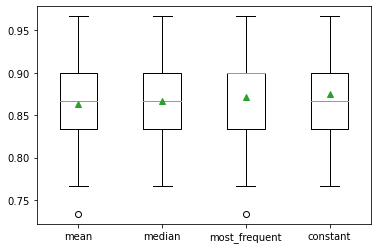

In [40]:
# compare statistical imputation strategies for the horse colic dataset

# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']

for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), 
                               ('m', RandomForestClassifier())])

    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy',
                             cv=cv, n_jobs=-1)

    # store results
    results.append(scores)

    print('>%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=strategies, showmeans=True)
plt.show()

In this case, the results suggest that using a constant value, e.g. 0, results in the best performance of about 87.7 percent. We can see that the distribution of accuracy scores for the constant strategy may be better than the other strategies.

<a id="predict"></a>
<h5 style="text-decoration:underline">SimpleImputer Transform When Making a Prediction</h5>

We may wish to create a final modeling pipeline with the constant imputation strategy and random forest algorithm, then make a prediction for new data. This can be achieved by defining the pipeline and fitting it on all available data, then calling the `predict()` function and passing new data in as an argument. ***Importantly, the row of new data must mark any missing values using the NaN value.***

In [41]:
pipeline = Pipeline(steps=[('i', SimpleImputer(strategy='constant')), 
                           ('m', RandomForestClassifier())])

# fit the model
pipeline.fit(X, y)

# define new (made-up in this case) data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, np.nan, 2, 5, 4, 4, np.nan, 
       np.nan, np.nan, 3, 5, 45.00, 8.40, np.nan, np.nan, 2, 11300,
       0, 0, 2]

# make a prediction
yhat = pipeline.predict([row])

# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


<a id="knn"></a>
<h3><ins>How to Use KNN Imputation</ins></h3>

Another popular approach to missing data imputation is to use a model to predict the missing values. This requires a model to be created for each input variable that has missing values. If input variables are numeric, then regression models can be used for prediction, and this case is quite common. Although any one among a range of different models can be used to predict the missing values, the **k-nearest neighbor (KNN)** algorithm has proven to be generally effective, often referred to as nearest neighbor imputation.  Configuration of KNN imputation often involves selecting the distance measure (e.g. Euclidean) and the number of contributing neighbors for each prediction, the k hyperparameter of the KNN algorithm.

The scikit-learn machine learning library provides the **`KNNImputer`** class that supports nearest neighbor imputation. By default, a euclidean distance metric that supports missing values, nan_euclidean_distances, is used to find the nearest neighbors. Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor. If a sample has more than one feature missing, then the neighbors for that sample can be different depending on the particular feature being imputed. When the number of available neighbors is less than n_neighbors and there are no defined distances to the training set, the training set average for that feature is used during imputation. If there is at least one neighbor with a defined distance, the weighted or unweighted average of the remaining neighbors will be used during imputation. If a feature is always missing in training, it is removed during transform.

<a id="data"></a>
<h5 style="text-decoration:underline">KNNImputer Data Transform</h5>

The `KNNImputer` is a data transform that is first configured based on the method used to estimate the missing values. The default distance measure is a *Euclidean* distance measure that is NaN aware, e.g. will not include NaN values when calculating the distance between members of the training dataset. This is set via the `metric` argument. The number of neighbors is set to five by default and can be configured by the `n neighbors` argument. Finally, the distance measure can be weighed proportional to the distance between instances (rows), although this is set to a uniform weighting by default, controlled via the `weights` argument.

In [42]:
from sklearn.impute import KNNImputer

In [43]:
# summarize total missing
print('Original - Missing: %d' % sum(np.isnan(X.values).flatten()))

# define imputer
imputer = KNNImputer()

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)

# summarize total missing -> Xtrans are values only so no need for .values
print('After KNN imputing - Missing: %d' % sum(np.isnan(Xtrans).flatten()))

Original - Missing: 1605
After KNN imputing - Missing: 0


<a id="model"></a>
<h5 style="text-decoration:underline">KNNImputer and Model Evaluation</h5>

It is a good practice to evaluate machine learning models on a dataset using k fold crossvalidation. To correctly apply nearest neighbor missing data imputation and avoid data leakage, it is required that the models calculated for each column are calculated on the training dataset only, then applied to the train and test sets for each fold in the dataset. This can be achieved by creating a modeling pipeline where the first step is the nearest neighbor imputation, then the second step is the model.

In [44]:
# define modeling pipeline
model = RandomForestClassifier()
imputer = KNNImputer(missing_values=np.nan, n_neighbors=5,
                     weights='uniform', metric='nan_euclidean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.862 (0.059)


How do we know that using a default number of neighbors of five is good or best for this dataset? The answer is that we don’t.

<a id="range"></a>
<h5 style="text-decoration:underline">KNNImputer and Different Number of Neighbors</h5>

The key hyperparameter for the KNN algorithm is k; that controls the number of nearest neighbors that are used to contribute to a prediction. It is good practice to test a suite of different values for k. 

> k=1 0.868 (0.052)
> k=3 0.854 (0.052)
> k=5 0.866 (0.054)
> k=7 0.866 (0.053)
> k=9 0.864 (0.053)
> k=15 0.859 (0.052)
> k=18 0.863 (0.062)
> k=21 0.861 (0.052)


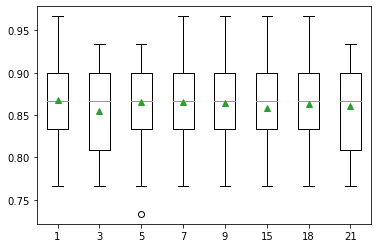

In [45]:
# evaluate each strategy on the dataset
results = list()
strategies = [str(i) for i in [1,3,5,7,9,15,18,21]]

for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))),
                               ('m', RandomForestClassifier())])
    
    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', 
                             cv=cv, n_jobs=-1)

    # store results
    results.append(scores)
    print('> k=%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=strategies, showmeans=True)
plt.show()

The plot suggest that there is not much difference in the k value when imputing the missing values, with minor fluctuations around the mean performance (green triangle).

<a id="make"></a>
<h5 style="text-decoration:underline">KNNImputer Transform When Making a Prediction</h5>

We may wish to create a final modeling pipeline with the nearest neighbor imputation strategy and random forest algorithm, then make a prediction for new data. This can be achieved by defining the pipeline and fitting it on all available data, then calling the `predict()` function and passing new data in as an argument. ***Importantly, the row of new data must mark any missing values using the NaN value.***

In [46]:
# create the modeling pipeline
pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=21)), 
                           ('m', RandomForestClassifier())])

# fit the model
pipeline.fit(X, y)

# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, np.nan, 2, 5, 4, 4, np.nan, 
       np.nan, np.nan, 3, 5, 45.00, 8.40, np.nan, np.nan, 2, 11300, 0, 0, 2]

# make a prediction
yhat = pipeline.predict([row])

# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


<a id="iter"></a>
<h3><ins>How to Use Iterative Imputation</ins></h3>

A sophisticated approach to imputing missing values is to use an **iterative imputation** model. Iterative imputation refers to a process where each feature is modeled as a function of the other features, e.g. a regression problem where missing values are predicted. Each feature is imputed sequentially, one after the other, allowing prior imputed values to be used as part of a model in predicting subsequent features.

It is iterative because this process is repeated multiple times, allowing ever improved estimates of missing values to be calculated as missing values across all features are estimated. This approach may be generally referred to as fully conditional specification (FCS) or multivariate imputation by chained equations (MICE).

Different regression algorithms can be used to estimate the missing values for each feature, although linear methods are often used for simplicity. The number of iterations of the procedure is often kept small, such as 10. Finally, the order that features are processed sequentially can be considered, such as from the feature with the least missing values to the feature with the most missing values.

<a id="iidt"></a>
<h5 style="text-decoration:underline">IterativeImputer Data Transform</h5>

`IterativeImputer` is a data transform that is first configured based on the method used to estimate the missing values. By default, a BayesianRidge model is employed that uses a function of all other input features. Features are filled in ascending order, from those with the fewest missing values to those with the most.

In [47]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [48]:
# summarize total missing
print('Original - Missing: %d' % sum(np.isnan(X.values).flatten()))

# define imputer
imputer = IterativeImputer()

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)

# summarize total missing -> Xtrans are values only so no need for .values
print('After iterative imputing - Missing: %d' % sum(np.isnan(Xtrans).flatten()))

Original - Missing: 1605
After iterative imputing - Missing: 0


<a id="ii_model"></a>
<h5 style="text-decoration:underline">IterativeImputer and Model Evaluation</h5>

It is a good practice to evaluate machine learning models on a dataset using k fold crossvalidation. To correctly apply iterative missing data imputation and avoid data leakage, it is required that the models for each column are calculated on the training dataset only, then applied to the train and test sets for each fold in the dataset. This can be achieved by creating a modeling pipeline where the first step is the iterative imputation, then the second step is the model.

In [49]:
# define modeling pipeline
model = RandomForestClassifier()
imputer = IterativeImputer()
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean Accuracy: 0.876 (0.049)


The pipeline is evaluated using three repeats of 10-fold cross-validation and reports the mean classification accuracy on the dataset as about 87%.

How do we know that using a default iterative strategy is good or best for this dataset? The answer is that we don’t.

<a id="order"></a>
<h5 style="text-decoration:underline">IterativeImputer and Different Imputation Order</h5>

By default, imputation is performed in ascending order from the feature with the least missing values to the feature with the most. This makes sense as we want to have more complete data when it comes time to estimating missing values for columns where the majority of values are missing. Nevertheless, we can experiment with different imputation order strategies, such as descending, right-to-left (Arabic), left-to-right (Roman), and random. The example below evaluates and compares each available imputation order configuration.

>Strategy: ascending 0.870 (0.055)
>Strategy: descending 0.872 (0.052)
>Strategy: roman 0.876 (0.053)
>Strategy: arabic 0.874 (0.052)
>Strategy: random 0.876 (0.054)


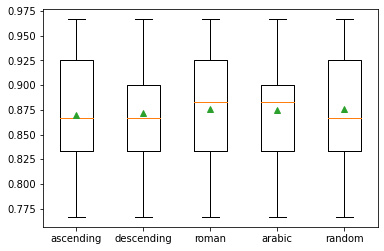

In [50]:
# evaluate each strategy on the dataset
results = list()
strategies = ['ascending', 'descending', 'roman', 'arabic', 'random']
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', IterativeImputer(imputation_order=s)),
                               ('m', RandomForestClassifier())])

    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy',
                             cv=cv, n_jobs=-1)

    # store results
    results.append(scores)

    print('>Strategy: %s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=strategies, showmeans=True)
plt.show()

<a id="number"></a>
<h5 style="text-decoration:underline">IterativeImputer and Different Number of Iterations</h5>

By default, the `IterativeImputer` will repeat the number of iterations 10 times. It is possible that a large number of iterations may begin to bias or skew the estimate and that few iterations may be preferred. The number of iterations of the procedure can be specified via the **`max_iter`** argument. It may be interesting to evaluate different numbers of iterations. 

>max_iter=1 0.876 (0.051)
>max_iter=2 0.864 (0.047)
>max_iter=3 0.862 (0.053)
>max_iter=4 0.872 (0.056)
>max_iter=5 0.874 (0.054)
>max_iter=6 0.870 (0.051)
>max_iter=7 0.873 (0.053)
>max_iter=8 0.873 (0.052)
>max_iter=9 0.869 (0.052)
>max_iter=10 0.871 (0.050)
>max_iter=11 0.867 (0.052)
>max_iter=12 0.874 (0.052)
>max_iter=13 0.872 (0.054)
>max_iter=14 0.874 (0.051)
>max_iter=15 0.869 (0.052)
>max_iter=16 0.871 (0.050)
>max_iter=17 0.872 (0.052)
>max_iter=18 0.877 (0.056)
>max_iter=19 0.866 (0.052)
>max_iter=20 0.879 (0.049)


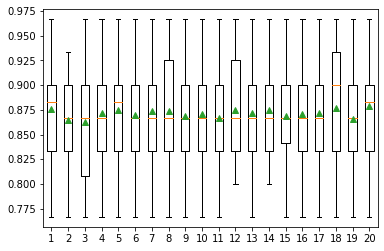

In [51]:
results = list()
strategies = [i for i in range(1, 21)]
for s in strategies:
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', IterativeImputer(max_iter=s)),
                               ('m', RandomForestClassifier())])

    # evaluate the model
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy',
                             cv=cv, n_jobs=-1)

    # store results
    results.append(scores)
    print('>max_iter=%s %.3f (%.3f)' % (s, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.boxplot(results, labels=strategies, showmeans=True)
plt.show()

<a id="ii_pred"></a>
<h5 style="text-decoration:underline">IterativeImputer Transform When Making a Prediction</h5>

We may wish to create a final modeling pipeline with the iterative imputation and random forest algorithm, then make a prediction for new data. This can be achieved by defining the pipeline and fitting it on all available data, then calling the `predict()` function, passing new data in as an argument. Importantly, the row of new data must mark any missing values using the NaN value.

In [52]:
pipeline = Pipeline(steps=[('i', IterativeImputer()), 
                           ('m', RandomForestClassifier())])

# fit the model
pipeline.fit(X, y)

# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, np.nan, 2, 5, 4, 4, np.nan, 
       np.nan, np.nan, 3, 5, 45.00, 8.40, np.nan, np.nan, 2, 11300,
       0, 0, 2]

# make a prediction
yhat = pipeline.predict([row])

# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


<a id="ref"></a>
<h3><ins>REFERENCES</ins></h3>

<ins>BOOKS</ins>
- [Data Preparation for Machine Learning by Jason Brownlee](https://machinelearningmastery.com/data-preparation-for-machine-learning/)

<ins>ARTICLES / WEBSITES</ins>
- [Towards Data Science - Using the missingno Python library to Identify and Visualise Missing Data Prior to Machine Learning](https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009)


<ins>PYTHON PACKAGES</ins>
- [missingno](https://github.com/ResidentMario/missingno)
- [sklearn - Novelty and Outlier Detection](https://scikit-learn.org/stable/modules/outlier_detection.html#)
- [sklearn - Imputation of missing values](https://scikit-learn.org/stable/modules/impute.html#)